# NBA Data Analysis

**Name:** Brayden Uglione

**Date:** 11/13/24

**Exercise:** Project #2, Part 2: Web Scraped Data Analysis and Visualizations

**Purpose:** Scrapes data from Basketball Reference for the 2020-24 NBA seasons, analyzes the data, and answers questions regarding team performance metrics.

## Load Data

### Import Libraries

In [1]:
# Alex The Analyst. (2023, June 27). BeautifulSoup + Requests | Web scraping in Python [Video]. YouTube. https://www.youtube.com/watch?v=bargNl2WeN4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

### Function to Scrape NBA Statistics

In [2]:
def scrape_nba_stats(url):
    # Alex The Analyst. (2023, June 27). BeautifulSoup + Requests | Web scraping in Python [Video]. YouTube. https://www.youtube.com/watch?v=bargNl2WeN4
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    # Initialize empty lists
    per_game_stats = []
    total_stats_team = []
    total_stats_opponent = []
    advanced_stats = []

    # Breuss, M. (2024, October 28). Beautiful soup: Build a web scraper with Python. https://realpython.com/beautiful-soup-web-scraper-python/

    # Scrape Per Game Stats
    per_game_table = soup.find('table', {'id': 'per_game-team'})
    for row in per_game_table.find_all('tr')[1:]: # Get data from the table
        cols = row.find_all('td') # Get all the columns in the row
        
        if cols: # Check if there are columns
            # Skip the row if it's the league average
            if cols[0].text.strip() == "League Average":
                continue
            
            # Extract the data from the columns
            team = cols[0].text.strip()
            three_point_attempts = float(cols[7].text.strip())
            total_rebounds = float(cols[17].text.strip())
            
            # Append the data to the list
            per_game_stats.append({
                'Team': team,
                '3PA': three_point_attempts,
                'TRB': total_rebounds
            })

    # Scrape Total Stats (Team)
    total_stats_table = soup.find('table', {'id': 'totals-team'})
    for row in total_stats_table.find_all('tr')[1:]: # Get data from the table
        cols = row.find_all('td') # Get all the columns in the row
        
        if cols: # Check if there are columns
            # Skip the row if it's the league average
            if cols[0].text.strip() == "League Average":
                continue
            
            # Extract the data from the columns
            team = cols[0].text.strip()
            points = int(cols[-1].text.strip())
            assists = int(cols[-6].text.strip())
            turnovers = int(cols[-3].text.strip())
            
            # Append the data to the list
            total_stats_team.append({
                'Team': team,
                'PTS': points,
                'AST': assists,
                'TOV': turnovers
            })
    
    # Scrape Total Stats (Opponent)
    opponent_stats_table = soup.find('table', {'id': 'totals-opponent'})
    for row in opponent_stats_table.find_all('tr')[1:]: # Get data from the table
        cols = row.find_all('td') # Get all the columns in the row
        
        if cols: # Check if there are columns
            # Skip the row if it's the league average
            if cols[0].text.strip() == "League Average":
                continue
            
            # Extract the data from the columns
            team = cols[0].text.strip() 
            points = int(cols[-1].text.strip())
            
            # Append the data to the list
            total_stats_opponent.append({
                'Team': team,
                'PTS_Opponent': points
            })

    # Scrape Advanced Stats
    advanced_stats_table = soup.find('table', {'id': 'advanced-team'})
    for row in advanced_stats_table.find_all('tr')[1:]: # Get data from the table
        cols = row.find_all('td') # Get all the columns in the row
        
        if cols: # Check if there are columns
            # Skip the row if it's the league average
            if cols[0].text.strip() == "League Average":
                continue
            
            # Extract the data from the columns
            team = cols[0].text.strip()
            offensive_rating = float(cols[9].text.strip())
            wins = int(cols[2].text.strip())
            losses = int(cols[3].text.strip())
            
            # Append the data to the list
            advanced_stats.append({
                'Team': team,
                'ORTg': offensive_rating,
                'W': wins,
                'L': losses
            })

    # Convert lists to DataFrames
    df_per_game = pd.DataFrame(per_game_stats)
    df_total_team = pd.DataFrame(total_stats_team)
    df_total_opponent = pd.DataFrame(total_stats_opponent)
    df_advanced = pd.DataFrame(advanced_stats)

    # ChatGPT, response to "How to merge pandas data frames", OpenAI, November 12, 2024.
    merged_df = df_per_game.merge(df_total_team, on='Team', how='outer').merge(df_total_opponent, on='Team', how='outer').merge(df_advanced, on='Team', how='outer')
    
    # Return the merged DataFrame
    return merged_df

### Use Functions to Scrape Data

In [3]:
# Scrape 2019-2020 data
url = "https://www.basketball-reference.com/leagues/NBA_2020.html"
nba_data_2020_df = scrape_nba_stats(url)

# Scrape 2020-2021 data
url = "https://www.basketball-reference.com/leagues/NBA_2021.html"
nba_data_2021_df = scrape_nba_stats(url)

# Scrape 2021-2022 data
url = "https://www.basketball-reference.com/leagues/NBA_2022.html"
nba_data_2022_df = scrape_nba_stats(url)

# Scrape 2022-2023 data
url = "https://www.basketball-reference.com/leagues/NBA_2023.html"
nba_data_2023_df = scrape_nba_stats(url)

# Scrape 2023-2024 data
url = "https://www.basketball-reference.com/leagues/NBA_2024.html"
nba_data_2024_df = scrape_nba_stats(url)

## Data Analysis and Visualization

### Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Question 1
How does the offensive efficiency correlate with team success in the 2023-24 NBA season?

Calculate Winning Percentage

In [ ]:
nba_data_2024_df['Win_Percentage'] = nba_data_2024_df['W'] / (nba_data_2024_df['W'] + nba_data_2024_df['L']) # Calculate win percentage

Sort Offensive Rating Values in Data Frame

In [ ]:
efficiency_data = nba_data_2024_df[['ORTg', 'Win_Percentage']].sort_values('ORTg') # Sort the columns for the analysis

Plot Data

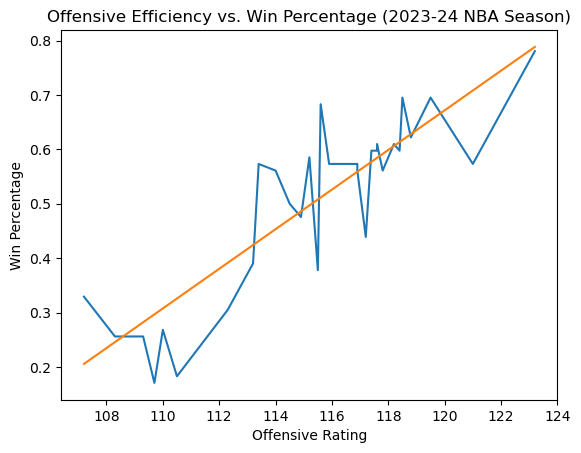

In [7]:
plt.plot(efficiency_data['ORTg'], efficiency_data['Win_Percentage']) # Create a line graph
plt.title('Offensive Efficiency vs. Win Percentage (2023-24 NBA Season)') # Add a title
# Add labels
plt.xlabel('Offensive Rating')
plt.ylabel('Win Percentage')

# ChatGPT, response to "How to make a trend line in matplotlib", OpenAI, November 12, 2024.
z = np.polyfit(efficiency_data['ORTg'], efficiency_data['Win_Percentage'], 1)
p = np.poly1d(z)
plt.plot(efficiency_data['ORTg'], p(efficiency_data['ORTg']))

plt.show() # Display the plot

### Question 2
Which teams had the best and worst point differentials in the 2022-23 NBA season?

Calculate Point Differential & Sort Values in Data Frame

In [8]:
nba_data_2023_df['Point_Differential'] = nba_data_2023_df['PTS'] - nba_data_2023_df['PTS_Opponent'] # Calculate point differential
df_sorted = nba_data_2023_df.sort_values('Point_Differential', ascending=False) # Sort the data by point differential

Plot Data

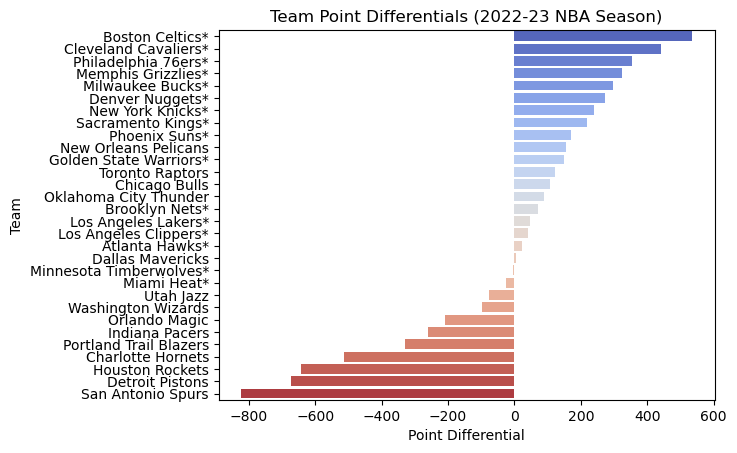

In [9]:
sns.barplot(data=df_sorted, x='Point_Differential', y='Team', palette='coolwarm') # Create a bar plot
plt.title('Team Point Differentials (2022-23 NBA Season)') # Add a title
# Add labels
plt.xlabel('Point Differential')
plt.ylabel('Team')

plt.show() # Display the plot

### Question 3
Is there a significant difference in the average number of three-pointers attempted between the top 5 and bottom 5 teams in the 2021-22 NBA season?

Sort Teams by Wins & Calculate Top & Bottom 5 Teams for Three-Pointers Attempted

In [10]:
df_sorted = nba_data_2022_df.sort_values('W', ascending=False) # Sort teams by wins

top_5 = df_sorted.head(5) # Get top 5 teams
bottom_5 = df_sorted.tail(5) # Get bottom 5 teams

Plot Data

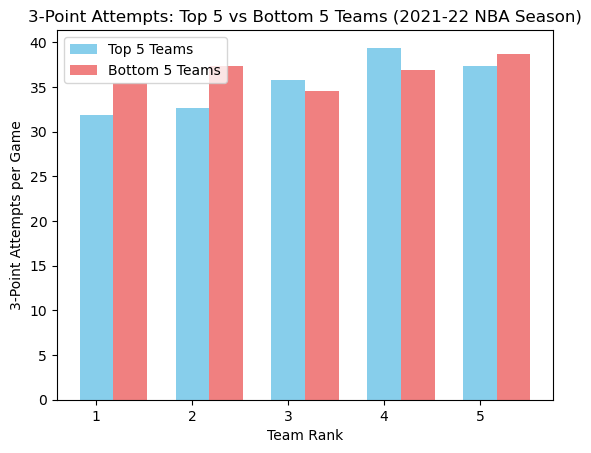

In [11]:
# Set up the plot
bar_width = 0.35
index = range(1, 6)

# ChatGPT, response to "How to create a grouped bar chart", OpenAI, November 12, 2024.
plt.bar(index, top_5['3PA'], bar_width, label='Top 5 Teams', color='skyblue')
plt.bar([i + bar_width for i in index], bottom_5['3PA'], bar_width, label='Bottom 5 Teams', color='lightcoral')

# Add labels
plt.xlabel('Team Rank')
plt.ylabel('3-Point Attempts per Game')

plt.title('3-Point Attempts: Top 5 vs Bottom 5 Teams (2021-22 NBA Season)') # Add a title
plt.legend() # Add a legend

plt.show() # Display the plot

### Question 4
How did the number of team rebounds correlate with team success in the 2020-21 NBA season?

Calculate Winning Percentage

In [12]:
nba_data_2021_df['Win_Percentage'] = nba_data_2021_df['W'] / (nba_data_2021_df['W'] + nba_data_2021_df['L']) # Calculate win percentage

Sort Rebounds Values (for better plotting)

In [13]:
rebounds_data = nba_data_2021_df[['TRB', 'Win_Percentage']].sort_values('TRB') # Sort data by total rebounds

Plot data

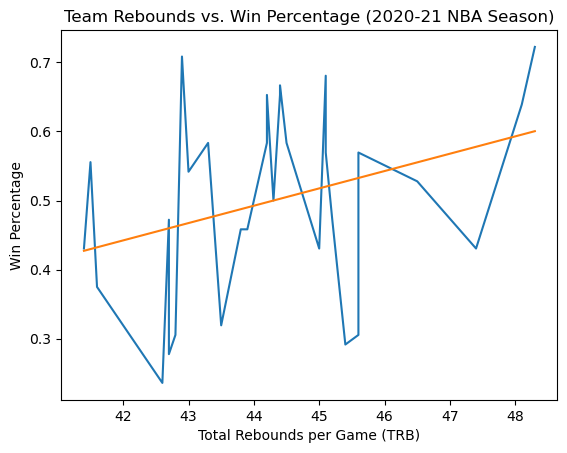

In [14]:
plt.plot(rebounds_data['TRB'], rebounds_data['Win_Percentage']) # Create a line graph
plt.title('Team Rebounds vs. Win Percentage (2020-21 NBA Season)') # Add a title
# Add labels
plt.xlabel('Total Rebounds per Game (TRB)')
plt.ylabel('Win Percentage')

# Add trend line
z = np.polyfit(rebounds_data['TRB'], rebounds_data['Win_Percentage'], 1)
p = np.poly1d(z)
plt.plot(rebounds_data['TRB'], p(rebounds_data['TRB']))

plt.show() # Display the plot

Test the correlation between Rebounds and Win Percentage

In [15]:
# ChatGPT, response to "How to find the correlation between two variables in a data frame", OpenAI, November 12, 2024.
correlation = rebounds_data['TRB'].corr(rebounds_data['Win_Percentage']) # Calculate correlation
print(f"Correlation between Total Rebounds and Win Percentage: {correlation:.2f}%") # Print correlation

Correlation between Total Rebounds and Win Percentage: 0.32%


### Question 5
Which teams had the highest and lowest assist-to-turnover ratios in the 2019-20 NBA season?

Calculate Assist to Turnover Ratio & Sort Values in Data Frame

In [16]:
nba_data_2020_df['AST_TO_Ratio'] = nba_data_2020_df['AST'] / nba_data_2020_df['TOV'] # Calculate assist-to-turnover ratio
df_sorted = nba_data_2020_df.sort_values('AST_TO_Ratio', ascending=False) # Sort data by assist-to-turnover ratio

Plot Data

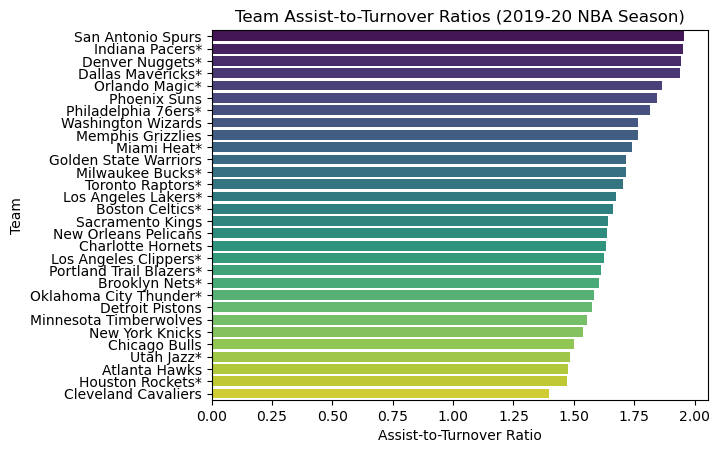

In [17]:
sns.barplot(data=df_sorted, x='AST_TO_Ratio', y='Team', palette='viridis') # Create a bar plot
plt.title('Team Assist-to-Turnover Ratios (2019-20 NBA Season)') # Add a title
# Add labels
plt.xlabel('Assist-to-Turnover Ratio')
plt.ylabel('Team')

plt.show() # Display the plot